In [3]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [6]:
X_train.shape #there are 60000 images data having 28x28 pixel

(60000, 28, 28)

In [8]:
X_test[0]#display a pixel of first image having 28 rows and 28 columns

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [9]:
y_train # it is label having images which is number

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

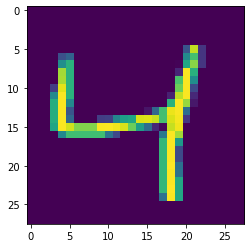

In [11]:
#show the second image

plt.imshow(X_train[2])

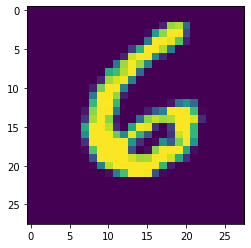

In [13]:
plt.imshow(X_train[90])

In [14]:
X_train=X_train/255
X_test=X_test/255

In [15]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [17]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [20]:
"""
flatten layer is not contain any trainable parameter(we can transform only higher dimentionl array into 1d array)
1st hidden layer contain 100480 parameter(784*126=100352+128(bias)=100480)
in last layer there are 1290 trainable parameter(128*10=1280+10(bias)=1290)
there are 101,770 wt and biases
"""

'\nflatten layer is not contain any trainable parameter(we can transform only higher dimentionl array into 1d array)\n1st hidden layer contain 100480 parameter(784*126=100352+128(bias)=100480)\nin last layer there are 1290 trainable parameter(128*10=1280+10(bias)=1290)\nthere are 101,770 wt and biases\n'

In [24]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam')

In [25]:
"""
if we use sparse_categorical_crossentopy then does not need to use OneHot Encoder
if we use categorical_crossentopy then it need to use OneHot Encoder
"""

'\nif we use sparse_categorical_crossentopy then does not need to use OneHot Encoder\nif we use categorical_crossentopy then it need to use OneHot Encoder\n'

In [26]:
model.fit(X_train,y_train,epochs=10,validation_split=0.2)# for validation purpose 20% data is separated for training data

Epoch 1/10
1500/1500 [==============================] - 11s 6ms/step - loss: 0.2912 - val_loss: 0.1632
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1277 - val_loss: 0.1205
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0868 - val_loss: 0.0960
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0643 - val_loss: 0.0911
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0487 - val_loss: 0.0930
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0381 - val_loss: 0.0865
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0294 - val_loss: 0.0862
Epoch 8/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0244 - val_loss: 0.0848
Epoch 9/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0191 - val_loss: 0.1031
Epoch 10/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.01

In [27]:
#prdiction
y_prob=model.predict(X_test) 

313/313 [==============================] - 1s 3ms/step


In [28]:
y_prob #it gives probability of number 0 to 9 for each image
#for eg. it gives 3.3005146e-12 for number 0 

array([[3.3005146e-12, 2.6989612e-11, 5.2746806e-08, ..., 9.9998319e-01,
        1.9370152e-08, 1.9918165e-08],
       [1.6267069e-13, 4.5698876e-08, 9.9999964e-01, ..., 6.0347588e-20,
        3.8274808e-07, 1.0337072e-18],
       [6.7114549e-08, 9.9851507e-01, 1.8252512e-04, ..., 6.0001580e-04,
        6.9387391e-04, 9.2985141e-07],
       ...,
       [7.9753140e-18, 1.0525550e-13, 4.4158042e-13, ..., 4.4141504e-07,
        5.9526219e-08, 1.8294086e-06],
       [3.7589194e-13, 1.5166920e-12, 2.1038533e-14, ..., 1.1924707e-10,
        3.4785986e-05, 2.4284595e-13],
       [7.3834593e-12, 1.3787206e-14, 2.8477587e-10, ..., 4.8614552e-13,
        1.4130459e-10, 1.8535771e-14]], dtype=float32)

In [29]:
y_pred=y_prob.argmax(axis=1) #find the max probability of perticular number

In [30]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_test,y_pred)

0.9761

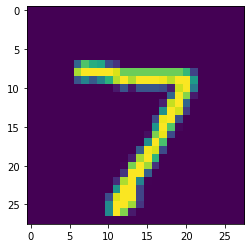

In [34]:
plt.imshow(X_test[0])

In [37]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 31ms/step


array([7], dtype=int64)

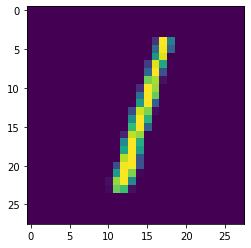

In [38]:
plt.imshow(X_test[2])

In [39]:
model.predict(X_test[2].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 32ms/step


array([1], dtype=int64)